In [1]:
import numpy as np
import pandas as pd

In [19]:
# Reading data files
df_wine = pd.read_csv("wine.data", header=None)
df_wine.columns = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [25]:
df_wine.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [33]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [39]:
import matplotlib.pyplot as plt


In [40]:
'''from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()'''

"from sklearn.tree import DecisionTreeClassifier\n\ntree = DecisionTreeClassifier(criterion='entropy', \n                              max_depth=4, \n                              random_state=1)\ntree.fit(X_train, y_train)\n\nX_combined = np.vstack((X_train, X_test))\ny_combined = np.hstack((y_train, y_test))\nplot_decision_regions(X_combined, y_combined, \n                      classifier=tree, test_idx=range(105, 150))\n\nplt.xlabel('petal length [cm]')\nplt.ylabel('petal width [cm]')\nplt.legend(loc='upper left')\nplt.tight_layout()\n#plt.savefig('images/03_20.png', dpi=300)\nplt.show()"

In [52]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_pca, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [53]:
acc_log_train = round(clf.score(X_train_pca, y_train)*100, 2)
acc_log_test = round(clf.score(X_test, y_test)*100 ,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 100.0
Testing Accuracy: % 38.89


In [54]:
#Create a svm Classifier
clf = svm.SVC(kernel ='rbf', random_state = 0) # Gaussian Kernel

#Train the model using the training sets
clf.fit(X_train_pca, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [55]:
acc_log_train = round(clf.score(X_train_pca, y_train)*100, 2)
acc_log_test = round(clf.score(X_test, y_test)*100 ,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 100.0
Testing Accuracy: % 38.89


 1) Alcohol                        0.333474
 2) Malic Acid                     0.325567
 3) Proline                        0.047417
 4) Proanthocyanins                0.046689
 5) Total phenols                  0.041533
 6) Magnesium                      0.037315
 7) Flavanoids                     0.027408
 8) Ash                            0.026497
 9) Hue                            0.026409
10) Nonflavanoid phenols           0.024814
11) Alcalinity of ash              0.023459
12) Color intensity                0.019838
13) OD280/OD315 of diluted wines   0.019580


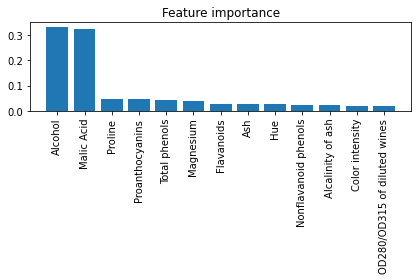

In [56]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train_pca, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_pca.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train_pca.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_pca.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_pca.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

In [57]:
acc_log_train = round(forest.score(X_train_pca, y_train)*100, 2)
acc_log_test = round(forest.score(X_test, y_test)*100 ,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 100.0
Testing Accuracy: % 27.78
